# WELCOME!

# #Determines

Using the [Online Retail dataset](https://archive.ics.uci.edu/ml/datasets/Online+Retail) from the UCI Machine Learning Repository for exploratory data analysis, ***Customer Segmentation***, ***RFM Analysis***, ***K-Means Clustering*** and ***Cohort Analysis***.

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

Feature Information:

**InvoiceNo**: Invoice number. *Nominal*, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation. 
<br>
**StockCode**: Product (item) code. *Nominal*, a 5-digit integral number uniquely assigned to each distinct product.
<br>
**Description**: Product (item) name. *Nominal*. 
<br>
**Quantity**: The quantities of each product (item) per transaction. *Numeric*.
<br>
**InvoiceDate**: Invoice Date and time. *Numeric*, the day and time when each transaction was generated.
<br>
**UnitPrice**: Unit price. *Numeric*, Product price per unit in sterling.
<br>
**CustomerID**: Customer number. *Nominal*, a 5-digit integral number uniquely assigned to each customer.
<br>
**Country**: Country name. *Nominal*, the name of the country where each customer resides.


---


First of all, to observe the structure of the data and missing values, you can use exploratory data analysis and data visualization techniques.

You must do descriptive analysis. Because you must understand the relationship of the features to each other and clear the noise and missing values in the data. After that, the data set will be ready for RFM analysis.

Before starting the RFM Analysis, you will be asked to do some analysis regarding the distribution of *Orders*, *Customers* and *Countries*. These analyzes will help the company develop its sales policies and contribute to the correct use of resources.

You will notice that the UK not only has the most sales revenue, but also the most customers. So you will continue to analyze only UK transactions in the next RFM Analysis, Customer Segmentation and K-Means Clustering topics.

Next, you will begin RFM Analysis, a customer segmentation technique based on customers' past purchasing behavior. 

By using RFM Analysis, you can enable companies to develop different approaches to different customer segments so that they can get to know their customers better, observe trends better, and increase customer retention and sales revenues.

You will calculate the Recency, Frequency and Monetary values of the customers in the RFM Analysis you will make using the data consisting of UK transactions. Ultimately, you have to create an RFM table containing these values.

In the Customer Segmentation section, you will create an RFM Segmentation Table where you segment your customers by using the RFM table. For example, you can label the best customer as "Big Spenders" and the lost customer as "Lost Customer".

We will segment the customers ourselves based on their recency, frequency, and monetary values. But can an **unsupervised learning** model do this better for us? You will use the K-Means algorithm to find the answer to this question. Then you will compare the classification made by the algorithm with the classification you have made yourself.

Before applying K-Means Clustering, you should do data pre-processing. In this context, it will be useful to examine feature correlations and distributions. In addition, the data you apply for K-Means should be normalized.

On the other hand, you should inform the K-means algorithm about the number of clusters it will predict. You will also try the *** Elbow method *** and *** Silhouette Analysis *** to find the optimum number of clusters.

After the above operations, you will have made cluster estimation with K-Means. You should visualize the cluster distribution by using a scatter plot. You can observe the properties of the resulting clusters with the help of the boxplot. Thus you will be able to tag clusters and interpret results.

Finally, you will do Cohort Analysis with the data you used at the beginning, regardless of the analysis you have done before. Cohort analysis is a subset of behavioral analytics that takes the user data and breaks them into related groups for analysis. This analysis can further be used to do customer segmentation and track metrics like retention, churn, and lifetime value.


# #Project Structures

- Data Cleaning & Exploratory Data Analysis
- RFM Analysis
- Customer Segmentation
- Applying K-Means Clustering


# #Tasks

#### 1. Data Cleaning & Exploratory Data Analysis

- Import Modules, Load Data & Data Review
- Follow the Steps Below

    *i. Take a look at relationships between InvoiceNo, Quantity and UnitPrice columns.*
    
    *ii. What does the letter "C" in the invoiceno column mean?*
    
    *iii. Handling Missing Values*
    
    *iv. Clean the Data from the Noise and Missing Values*
    
    *v. Explore the Orders*
    
    *vi. Explore Customers by Country*
    
    *vii. Explore the UK Market*
    
#### 2. RFM Analysis

- Follow the steps below

   *i. Import Libraries*
   
   *ii. Review "df_uk" DataFrame (the df_uk what you create at the end of the Task 1)*
   
   *iii. Calculate Recency*
   
   *iv. Calculate Frequency*
   
   *v. Calculate Monetary Values*
   
   *vi. Create RFM Table*

#### 3. Customer Segmentation with RFM Scores
- Calculate RFM Scoring

    *i. Creating the RFM Segmentation Table*
 
- Plot RFM Segments

#### 4. Applying K-Means Clustering
- Data Pre-Processing and Exploring

    *i. Define and Plot Feature Correlations*
 
    *ii. Visualize Feature Distributions*
 
    *iii. Data Normalization*

- K-Means Implementation

    *i. Define Optimal Cluster Number (K) by using "Elbow Method" and "Silhouette Analysis"*
 
    *ii. Visualize the Clusters*
 
    *iii. Assign the label*
 
    *iv. Conclusion*
 


# 1. Data Cleaning & Exploratory Data Analysis

## Import Modules, Load Data & Data Review

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.options.display.float_format = '{:.3f}'.format
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)

In [ ]:
df=pd.read_excel('/content/Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365.000,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.000,2010-12-01 08:26:00,2.550,17850.000,United Kingdom
1,536365.000,71053.000,WHITE METAL LANTERN,6.000,2010-12-01 08:26:00,3.390,17850.000,United Kingdom
2,536365.000,84406B,CREAM CUPID HEARTS COAT HANGER,8.000,2010-12-01 08:26:00,2.750,17850.000,United Kingdom
3,536365.000,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.000,2010-12-01 08:26:00,3.390,17850.000,United Kingdom
4,536365.000,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.000,2010-12-01 08:26:00,3.390,17850.000,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  float64       
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 33.1+ MB


In [ ]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
df.isnull().sum()*100/len(df)

InvoiceNo      0.000
StockCode      0.000
Description    0.268
Quantity       0.000
InvoiceDate    0.000
UnitPrice      0.000
CustomerID    24.927
Country        0.000
dtype: float64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.000,9.552,218.081,-80995.000,1.000,3.000,10.000,80995.000
UnitPrice,541909.000,4.611,96.760,-11062.060,1.250,2.080,4.130,38970.000
CustomerID,406829.000,15287.691,1713.600,12346.000,13953.000,15152.000,16791.000,18287.000


In [ ]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

### i. Let's take a look at relationships between InvoiceNo, Quantity and UnitPrice columns.

In [ ]:
df['Total']=df['Quantity']*df['UnitPrice']

In [ ]:
df.groupby(['InvoiceNo'])['Total'].sum().sort_values()

InvoiceNo
C581484    -168469.600
C541433     -77183.600
C556445     -38970.000
C550456     -22998.400
C580605     -17836.460
               ...    
556444.0     38970.000
576365.0     50653.910
574941.0     52940.940
541431.0     77183.600
581483.0    168469.600
Name: Total, Length: 25900, dtype: float64

In [ ]:
df.loc[(df['UnitPrice']<0)&(df['Quantity']<0)].sum()
#from this, we can say that  if the new 'Total' column  we created  is less than zero,
 #that order has probably been canceled or abandoned.

InvoiceNo     0.000
StockCode     0.000
Description   0.000
Quantity      0.000
UnitPrice     0.000
CustomerID    0.000
Country       0.000
Total         0.000
dtype: float64

In [ ]:
df.loc[df['Total']<0]['Total'].sum().round() #total of the canceled orders

-918937.0

In [ ]:
df.loc[df['Total']<0].groupby(['InvoiceNo'])[['Total']].sum()

,Total
InvoiceNo,
A563186,-11062.060
A563187,-11062.060
C536379,-27.500
C536383,-4.650
C536391,-141.480
...,...
C581484,-168469.600
C581490,-32.530
C581499,-224.690


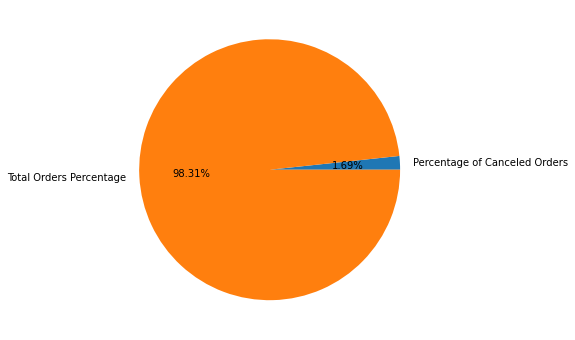

In [ ]:
plt.pie([len(df.loc[df['Total']<0]),len(df)],labels=['Percentage of Canceled Orders','Total Orders Percentage'],autopct='%.2f%%');

In [ ]:
len(df.loc[df['Quantity']<0])

10624

In [ ]:
df.loc[df['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
141,C536379,D,Discount,-1.000,2010-12-01 09:41:00,27.500,14527.000,United Kingdom,-27.500
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1.000,2010-12-01 09:49:00,4.650,15311.000,United Kingdom,-4.650
235,C536391,22556.000,PLASTERS IN TIN CIRCUS PARADE,-12.000,2010-12-01 10:24:00,1.650,17548.000,United Kingdom,-19.800
236,C536391,21984.000,PACK OF 12 PINK PAISLEY TISSUES,-24.000,2010-12-01 10:24:00,0.290,17548.000,United Kingdom,-6.960
237,C536391,21983.000,PACK OF 12 BLUE PAISLEY TISSUES,-24.000,2010-12-01 10:24:00,0.290,17548.000,United Kingdom,-6.960
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144.000,ZINC T-LIGHT HOLDER STARS SMALL,-11.000,2011-12-09 09:57:00,0.830,14397.000,United Kingdom,-9.130
541541,C581499,M,Manual,-1.000,2011-12-09 10:28:00,224.690,15498.000,United Kingdom,-224.690
541715,C581568,21258.000,VICTORIAN SEWING BOX LARGE,-5.000,2011-12-09 11:57:00,10.950,15311.000,United Kingdom,-54.750
541716,C581569,84978.000,HANGING HEART JAR T-LIGHT HOLDER,-1.000,2011-12-09 11:58:00,1.250,17315.000,United Kingdom,-1.250


In [ ]:
len(df.loc[df['UnitPrice']<0])

2

In [ ]:
df.loc[df['UnitPrice']<0]
#A bad debt is money owed to the company that you decide is not collectible.
#That means there are purchases, but no money is collected.

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
299983,A563186,B,Adjust bad debt,1.000,2011-08-12 14:51:00,-11062.060,NaN,United Kingdom,-11062.060
299984,A563187,B,Adjust bad debt,1.000,2011-08-12 14:52:00,-11062.060,NaN,United Kingdom,-11062.060


### iii. Handling Missing Values

In [ ]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
Total               0
dtype: int64

In [ ]:
df.loc[df['CustomerID'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
622,536414.000,22139.000,NaN,56.000,2010-12-01 11:52:00,0.000,NaN,United Kingdom,0.000
1443,536544.000,21773.000,DECORATIVE ROSE BATHROOM BOTTLE,1.000,2010-12-01 14:32:00,2.510,NaN,United Kingdom,2.510
1444,536544.000,21774.000,DECORATIVE CATS BATHROOM BOTTLE,2.000,2010-12-01 14:32:00,2.510,NaN,United Kingdom,5.020
1445,536544.000,21786.000,POLKADOT RAIN HAT,4.000,2010-12-01 14:32:00,0.850,NaN,United Kingdom,3.400
1446,536544.000,21787.000,RAIN PONCHO RETROSPOT,2.000,2010-12-01 14:32:00,1.660,NaN,United Kingdom,3.320
...,...,...,...,...,...,...,...,...,...
541536,581498.000,85099B,JUMBO BAG RED RETROSPOT,5.000,2011-12-09 10:26:00,4.130,NaN,United Kingdom,20.650
541537,581498.000,85099C,JUMBO BAG BAROQUE BLACK WHITE,4.000,2011-12-09 10:26:00,4.130,NaN,United Kingdom,16.520
541538,581498.000,85150.000,LADIES & GENTLEMEN METAL SIGN,1.000,2011-12-09 10:26:00,4.960,NaN,United Kingdom,4.960
541539,581498.000,85174.000,S/4 CACTI CANDLES,1.000,2011-12-09 10:26:00,10.790,NaN,United Kingdom,10.790


In [ ]:
df.loc[df['Description'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
622,536414.000,22139.000,NaN,56.000,2010-12-01 11:52:00,0.000,NaN,United Kingdom,0.000
1970,536545.000,21134.000,NaN,1.000,2010-12-01 14:32:00,0.000,NaN,United Kingdom,0.000
1971,536546.000,22145.000,NaN,1.000,2010-12-01 14:33:00,0.000,NaN,United Kingdom,0.000
1972,536547.000,37509.000,NaN,1.000,2010-12-01 14:33:00,0.000,NaN,United Kingdom,0.000
1987,536549.000,85226A,NaN,1.000,2010-12-01 14:34:00,0.000,NaN,United Kingdom,0.000
...,...,...,...,...,...,...,...,...,...
535322,581199.000,84581.000,NaN,-2.000,2011-12-07 18:26:00,0.000,NaN,United Kingdom,-0.000
535326,581203.000,23406.000,NaN,15.000,2011-12-07 18:31:00,0.000,NaN,United Kingdom,0.000
535332,581209.000,21620.000,NaN,6.000,2011-12-07 18:35:00,0.000,NaN,United Kingdom,0.000
536981,581234.000,72817.000,NaN,27.000,2011-12-08 10:33:00,0.000,NaN,United Kingdom,0.000


In [ ]:
df.loc[(df['Description'].isnull())&(df['CustomerID'].isnull())]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
622,536414.000,22139.000,NaN,56.000,2010-12-01 11:52:00,0.000,NaN,United Kingdom,0.000
1970,536545.000,21134.000,NaN,1.000,2010-12-01 14:32:00,0.000,NaN,United Kingdom,0.000
1971,536546.000,22145.000,NaN,1.000,2010-12-01 14:33:00,0.000,NaN,United Kingdom,0.000
1972,536547.000,37509.000,NaN,1.000,2010-12-01 14:33:00,0.000,NaN,United Kingdom,0.000
1987,536549.000,85226A,NaN,1.000,2010-12-01 14:34:00,0.000,NaN,United Kingdom,0.000
...,...,...,...,...,...,...,...,...,...
535322,581199.000,84581.000,NaN,-2.000,2011-12-07 18:26:00,0.000,NaN,United Kingdom,-0.000
535326,581203.000,23406.000,NaN,15.000,2011-12-07 18:31:00,0.000,NaN,United Kingdom,0.000
535332,581209.000,21620.000,NaN,6.000,2011-12-07 18:35:00,0.000,NaN,United Kingdom,0.000
536981,581234.000,72817.000,NaN,27.000,2011-12-08 10:33:00,0.000,NaN,United Kingdom,0.000


### iv. Clean the Data from the Noise and Missing Values

In [ ]:
df.loc[(df['Description'].isnull())&(df['CustomerID'].isnull())]['Total'].sum()
#From this data, we can conclude that in these rows, data are either completely missing or there are data entry problems. 
#These rows aren't giving us any insight into our analysis so we can drop them.

0.0

In [ ]:

df=df.drop(index=df.loc[df['Description'].isnull()].index).reset_index(drop=True)

In [ ]:
df=df.drop(index=df.loc[df['CustomerID'].isnull()].index).reset_index(drop=True)

In [ ]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Total          0
dtype: int64

In [ ]:
df.sample(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
35717,541123.000,22138.000,BAKING SET 9 PIECE RETROSPOT,3.000,2011-01-14 09:52:00,4.950,13385.000,United Kingdom,14.850
344843,575744.000,21314.000,SMALL GLASS HEART TRINKET POT,8.000,2011-11-11 10:03:00,2.100,14035.000,United Kingdom,16.800
228593,564552.000,22620.000,4 TRADITIONAL SPINNING TOPS,12.000,2011-08-25 17:22:00,1.450,16670.000,United Kingdom,17.400
218496,563506.000,23293.000,SET OF 12 FAIRY CAKE BAKING CASES,8.000,2011-08-17 09:48:00,0.830,17398.000,United Kingdom,6.640
395717,580600.000,22644.000,CERAMIC CHERRY CAKE MONEY BANK,2.000,2011-12-05 11:13:00,0.390,12841.000,United Kingdom,0.780
340744,575352.000,21122.000,SET/10 PINK POLKADOT PARTY CANDLES,24.000,2011-11-09 14:56:00,1.250,12504.000,Germany,30.000
204826,561926.000,23236.000,DOILEY STORAGE TIN,6.000,2011-08-01 12:48:00,2.890,12749.000,United Kingdom,17.340
143583,C554345,22729.000,ALARM CLOCK BAKELIKE ORANGE,-1.000,2011-05-23 17:47:00,3.750,13767.000,United Kingdom,-3.750
30646,540467.000,21319.000,GLASS CHALICE GREEN SMALL,6.000,2011-01-07 13:39:00,1.650,18198.000,United Kingdom,9.900
10256,537601.000,48187.000,DOORMAT NEW ENGLAND,1.000,2010-12-07 12:43:00,7.950,17287.000,United Kingdom,7.950


### v. Explore the Orders


In [ ]:
df.groupby(['CustomerID'])[['InvoiceNo']].nunique()

,InvoiceNo
CustomerID,
12346.000,2
12347.000,7
12348.000,4
12349.000,1
12350.000,1
...,...
18280.000,1
18281.000,1
18282.000,3


In [ ]:
df.groupby(['CustomerID'])[['StockCode']].nunique()/df.groupby(['CustomerID'])[['StockCode']].count()

,StockCode
CustomerID,
12346.000,0.500
12347.000,0.566
12348.000,0.710
12349.000,1.000
12350.000,1.000
...,...
18280.000,1.000
18281.000,1.000
18282.000,0.923


In [ ]:
df.groupby(['CustomerID'])[['StockCode']].nunique()

,StockCode
CustomerID,
12346.000,1
12347.000,103
12348.000,22
12349.000,73
12350.000,17
...,...
18280.000,10
18281.000,7
18282.000,12


### vi. Explore Customers by Country

In [ ]:
df.groupby(['Country'])['Total'].sum()

Country
Australia               137077.270
Austria                  10154.320
Bahrain                    548.400
Belgium                  40910.960
Brazil                    1143.600
Canada                    3666.380
Channel Islands          20086.290
Cyprus                   12946.290
Czech Republic             707.720
Denmark                  18768.140
EIRE                    250285.220
European Community        1291.750
Finland                  22326.740
France                  196712.840
Germany                 221698.210
Greece                    4710.520
Iceland                   4310.000
Israel                    6994.250
Italy                    16890.510
Japan                    35340.620
Lebanon                   1693.880
Lithuania                 1661.060
Malta                     2505.470
Netherlands             284661.540
Norway                   35163.460
Poland                    7213.140
Portugal                 29059.810
RSA                       1002.310
Saudi Arabia

2. Visualize number of customer per country

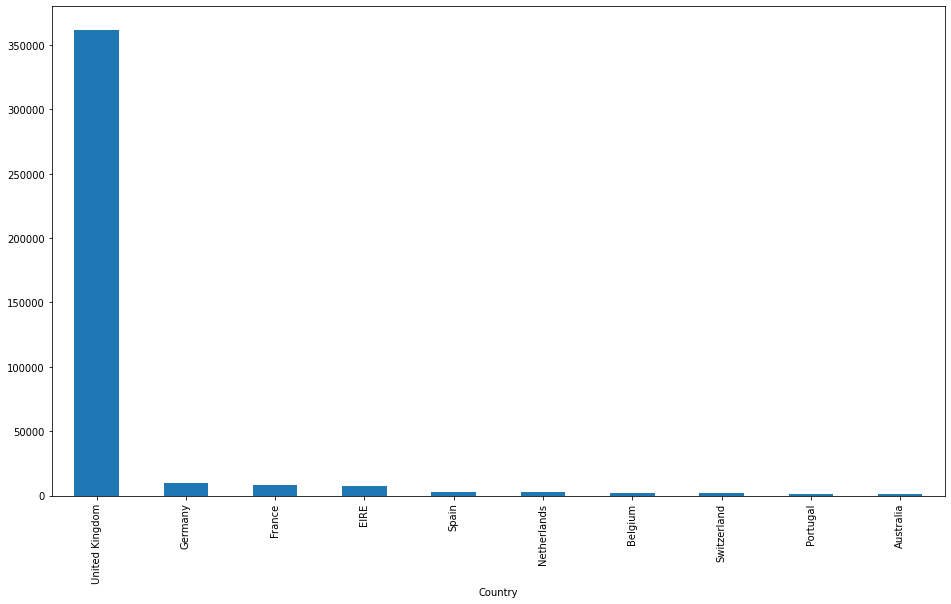

In [ ]:
df.groupby(['Country'])['CustomerID'].count().sort_values(ascending=False).head(10).plot(kind='bar',figsize=(16,9))

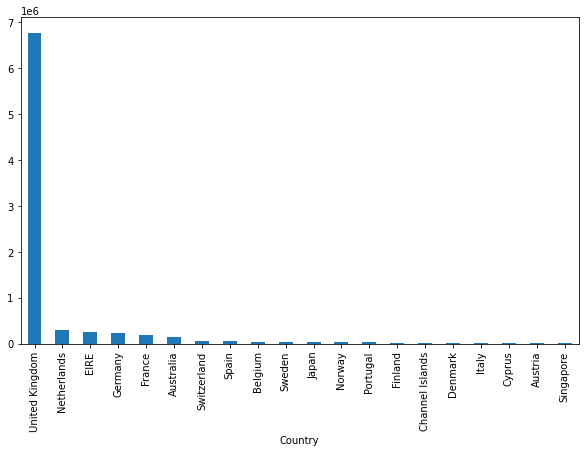

In [ ]:
df.groupby(['Country'])['Total'].sum().sort_values(ascending=False).head(20).plot(kind='bar')

### vii. Explore the UK Market


In [ ]:
df_uk=df.loc[df['Country']=='United Kingdom']

In [ ]:
df_uk['Description'].value_counts().head(20)

WHITE HANGING HEART T-LIGHT HOLDER    1980
REGENCY CAKESTAND 3 TIER              1574
JUMBO BAG RED RETROSPOT               1505
ASSORTED COLOUR BIRD ORNAMENT         1343
PARTY BUNTING                         1327
LUNCH BAG RED RETROSPOT               1185
SET OF 3 CAKE TINS PANTRY DESIGN      1080
LUNCH BAG  BLACK SKULL.               1069
PAPER CHAIN KIT 50'S CHRISTMAS         991
NATURAL SLATE HEART CHALKBOARD         968
HEART OF WICKER SMALL                  963
REX CASH+CARRY JUMBO SHOPPER           946
SPOTTY BUNTING                         932
LUNCH BAG CARS BLUE                    928
LUNCH BAG SPACEBOY DESIGN              905
PACK OF 72 RETROSPOT CAKE CASES        894
LUNCH BAG PINK POLKADOT                893
LUNCH BAG SUKI DESIGN                  883
WOODEN PICTURE FRAME WHITE FINISH      881
JUMBO BAG PINK POLKADOT                844
Name: Description, dtype: int64

### We will continue analyzing the UK transactions with customer segmentation.

# 2. RFM Analysis

In the age of the internet and e-commerce, companies that do not expand their businesses online or utilize digital tools to reach their customers will run into issues like scalability and a lack of digital precsence. An important marketing strategy e-commerce businesses use for analyzing and predicting customer value is customer segmentation. Customer data is used to sort customers into group based on their behaviors and preferences.

**[RFM](https://www.putler.com/rfm-analysis/) (Recency, Frequency, Monetary) Analysis** is a customer segmentation technique for analyzing customer value based on past buying behavior. RFM analysis was first used by the direct mail industry more than four decades ago, yet it is still an effective way to optimize your marketing.
<br>
<br>
Our goal in this Notebook is to cluster the customers in our data set to:
 - Recognize who are our most valuable customers
 - Increase revenue
 - Increase customer retention
 - Learn more about the trends and behaviors of our customers
 - Define customers that are at risk

We will start with **RFM Analysis** and then compliment our findings with predictive analysis using **K-Means Clustering Algorithms.**

- RECENCY (R): Time since last purchase
- FREQUENCY (F): Total number of purchases
- MONETARY VALUE (M): Total monetary value




Benefits of RFM Analysis

- Increased customer retention
- Increased response rate
- Increased conversion rate
- Increased revenue

RFM Analysis answers the following questions:
 - Who are our best customers?
 - Who has the potential to be converted into more profitable customers?
 - Which customers do we need to retain?
 - Which group of customers is most likely to respond to our marketing campaign?
 

### i. Import Libraries

In [ ]:
import datetime as dt

### ii. Review df_uk DataFrame

In [ ]:
df_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
0,536365.000,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.000,2010-12-01 08:26:00,2.550,17850.000,United Kingdom,15.300
1,536365.000,71053.000,WHITE METAL LANTERN,6.000,2010-12-01 08:26:00,3.390,17850.000,United Kingdom,20.340
2,536365.000,84406B,CREAM CUPID HEARTS COAT HANGER,8.000,2010-12-01 08:26:00,2.750,17850.000,United Kingdom,22.000
3,536365.000,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.000,2010-12-01 08:26:00,3.390,17850.000,United Kingdom,20.340
4,536365.000,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.000,2010-12-01 08:26:00,3.390,17850.000,United Kingdom,20.340


In [ ]:
df_uk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361878 entries, 0 to 406813
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    361878 non-null  object        
 1   StockCode    361878 non-null  object        
 2   Description  361878 non-null  object        
 3   Quantity     361878 non-null  float64       
 4   InvoiceDate  361878 non-null  datetime64[ns]
 5   UnitPrice    361878 non-null  float64       
 6   CustomerID   361878 non-null  float64       
 7   Country      361878 non-null  object        
 8   Total        361878 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 27.6+ MB


In [ ]:
df_uk.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Total          0
dtype: int64

In [ ]:
df_uk['CustomerID']=df_uk['CustomerID'].astype('int')

In [ ]:
df_uk.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,361878.000,11.077,263.129,-80995.000,2.000,4.000,12.000,80995.000
UnitPrice,361878.000,3.256,70.655,0.000,1.250,1.950,3.750,38970.000
CustomerID,361878.000,15547.871,1594.403,12346.000,14194.000,15514.000,16931.000,18287.000
Total,361878.000,18.702,451.918,-168469.600,3.750,10.200,17.700,168469.600


### iii. Recency: Days since last purchase


In [ ]:
df_uk['InvoiceDate'].max()

Timestamp('2011-12-09 12:49:00')

In [ ]:
day=dt.datetime(2011,12,10)
day

datetime.datetime(2011, 12, 10, 0, 0)

In [ ]:
df_uk['Date']=df_uk['InvoiceDate'].dt.strftime('%Y-%m-%d')

In [ ]:
df_uk['Date']=df_uk['Date'].astype('datetime64')

In [ ]:
df_uk.drop(columns=['InvoiceDate'],inplace=True)

In [ ]:
df_uk.groupby(['CustomerID'])['Date'].max()

CustomerID
12346   2011-01-18
12747   2011-12-07
12748   2011-12-09
12749   2011-12-06
12820   2011-12-06
           ...    
18280   2011-03-07
18281   2011-06-12
18282   2011-12-02
18283   2011-12-06
18287   2011-10-28
Name: Date, Length: 3950, dtype: datetime64[ns]

In [ ]:
df_uk['Recency']=df_uk['Date'].transform(lambda x :(day-x).days)


In [ ]:
df_recency=df_uk.groupby(['CustomerID'])[['Recency']].max()

In [ ]:
df_recency.max()

Recency    374
dtype: int64

In [ ]:
df_uk=df_uk.drop(columns=['Date'])

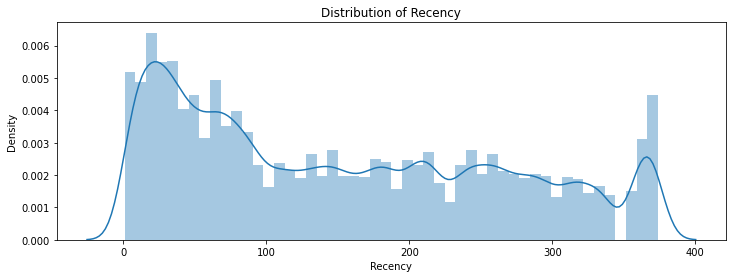

In [ ]:
fig, ax = plt.subplots(figsize=(12,4))
sns.distplot(df_uk['Recency'])
ax.set_title('Distribution of Recency');
    

### iv. Frequency: Number of purchases

To calculate how many times a customer purchased something, we need to count how many invoices each customer has.

In [ ]:
df_uk_copy=df_uk.copy()

In [ ]:
df_uk.duplicated().sum()

5151

In [ ]:
df_uk.drop_duplicates(inplace=True)


In [ ]:
df_uk=df_uk.reset_index(drop=True)

2. Calculate the frequency of purchases

In [ ]:
df_frequency=df_uk.groupby(['CustomerID'])[['InvoiceNo']].count()

In [ ]:
df_frequency

,InvoiceNo
CustomerID,
12346,2
12747,103
12748,4459
12749,231
12820,59
...,...
18280,10
18281,7
18282,13


3. Plot RFM distributions

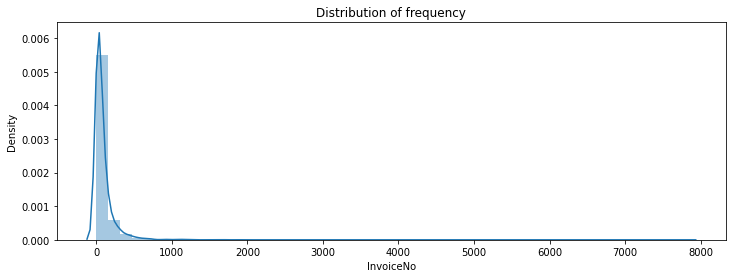

In [ ]:
fig, ax = plt.subplots(figsize=(12,4))
sns.distplot(df_frequency['InvoiceNo'])
ax.set_title('Distribution of frequency');

### v. Monetary: Total amount of money spent

The monetary value is calculated by adding together the cost of the customers' purchases.


In [ ]:
df_monetary=df_uk_copy.groupby(['CustomerID'])[['Total']].sum()

In [ ]:
df_uk_copy['Total'].sum()

6767873.393999998

In [ ]:
df_uk['Total'].sum()

6747152.254

In [ ]:
df_monetary.loc[df_monetary['Total']<0].count()

Total    38
dtype: int64

2. Plot RFM distributions

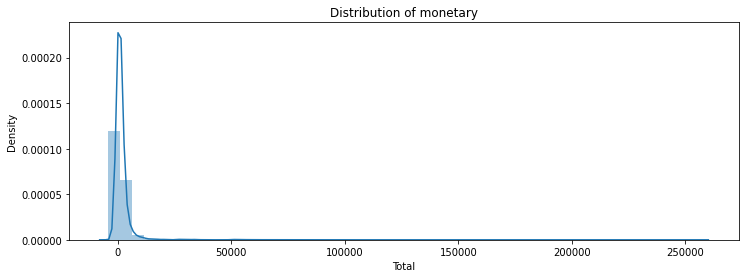

In [ ]:
fig, ax = plt.subplots(figsize=(12,4))
sns.distplot(df_monetary['Total'])
ax.set_title('Distribution of monetary');

### vi. Create RFM Table
Merge the recency, frequency and motetary dataframes

In [ ]:
df_RFM=pd.concat([df_frequency,df_monetary,df_recency],axis=1)

In [ ]:
df_RFM

,InvoiceNo,Total,Recency
CustomerID,,,
12346,2,0.000,326
12747,103,4196.010,370
12748,4459,29072.100,374
12749,231,3868.200,214
12820,59,942.340,327
...,...,...,...
18280,10,180.600,278
18281,7,80.820,181
18282,13,176.600,127


In [ ]:
df_RFM.rename(columns={'InvoiceNo':'Frequency','Total':'Monetary'},inplace=True)

In [ ]:
df_RFM

,Frequency,Monetary,Recency
CustomerID,,,
12346,2,0.000,326
12747,103,4196.010,370
12748,4459,29072.100,374
12749,231,3868.200,214
12820,59,942.340,327
...,...,...,...
18280,10,180.600,278
18281,7,80.820,181
18282,13,176.600,127


In [ ]:
df_RFM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3950 entries, 12346 to 18287
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Frequency  3950 non-null   int64  
 1   Monetary   3950 non-null   float64
 2   Recency    3950 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 123.4 KB


# 3. Customer Segmentation with RFM Scores

In [ ]:
df_RFM

,Frequency,Monetary,Recency
CustomerID,,,
12346,2,0.000,326
12747,103,4196.010,370
12748,4459,29072.100,374
12749,231,3868.200,214
12820,59,942.340,327
...,...,...,...
18280,10,180.600,278
18281,7,80.820,181
18282,13,176.600,127


In [ ]:
df_RFM['R']=pd.qcut(df_RFM["Recency"],4,labels=[4,3,2,1])

In [ ]:
df_RFM['M']=pd.qcut(df_RFM["Monetary"],4,labels=[1,2,3,4])

In [ ]:
df_RFM['F']=pd.qcut(df_RFM["Frequency"],4,labels=[1,2,3,4])

In [ ]:
df_RFM.sample(10)

,Frequency,Monetary,Recency,R,M,F
CustomerID,,,,,,
13419,16,221.060,64,4,1,1
18116,371,1418.030,365,1,3,4
13723,6,199.850,218,3,1,1
15489,55,1090.030,212,3,3,3
12930,27,409.900,172,3,2,2
14130,66,483.860,320,2,2,3
16202,18,365.270,361,1,2,2
15113,98,3439.410,55,4,4,3
12849,48,1050.890,269,2,3,3


In [ ]:
df_RFM.describe()

,Frequency,Monetary,Recency
count,3950.000,3950.000,3950.000
mean,90.311,1713.386,226.465
std,216.804,6548.608,118.569
min,1.000,-4287.630,2.000
25%,17.000,282.255,116.000
50%,41.000,627.060,254.000
75%,99.000,1521.783,332.750
max,7812.000,256438.490,374.000


In [ ]:
df_RFM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3950 entries, 12346 to 18287
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Frequency  3950 non-null   int64   
 1   Monetary   3950 non-null   float64 
 2   Recency    3950 non-null   int64   
 3   R          3950 non-null   category
 4   M          3950 non-null   category
 5   F          3950 non-null   category
dtypes: category(3), float64(1), int64(2)
memory usage: 135.6 KB


### i. Creating the RFM Segmentation Table


In [ ]:
df_RFM['RMF_score']=df_RFM['R'].astype('str')+df_RFM['M'].astype('str')+df_RFM['F'].astype('str')

In [ ]:
df_RFM

,Frequency,Monetary,Recency,R,M,F,RMF_score
CustomerID,,,,,,,
12346,2,0.000,326,2,1,1,211
12747,103,4196.010,370,1,4,4,144
12748,4459,29072.100,374,1,4,4,144
12749,231,3868.200,214,3,4,4,344
12820,59,942.340,327,2,3,3,233
...,...,...,...,...,...,...,...
18280,10,180.600,278,2,1,1,211
18281,7,80.820,181,3,1,1,311
18282,13,176.600,127,3,1,1,311


In [ ]:
df_RFM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3950 entries, 12346 to 18287
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Frequency  3950 non-null   int64   
 1   Monetary   3950 non-null   float64 
 2   Recency    3950 non-null   int64   
 3   R          3950 non-null   category
 4   M          3950 non-null   category
 5   F          3950 non-null   category
 6   RMF_score  3950 non-null   object  
dtypes: category(3), float64(1), int64(2), object(1)
memory usage: 166.5+ KB


In [ ]:
df_RFM['RMF_score'].value_counts(ascending=False)

144    382
411    244
244    209
311    206
422    175
333    156
211    147
322    141
233    139
222    109
433    104
111     99
344     97
133     95
421     82
412     80
143     77
134     73
423     71
122     68
312     67
321     67
234     59
332     56
223     55
432     52
221     51
232     51
243     51
323     51
123     47
343     45
334     44
132     43
413     42
212     41
434     39
444     38
121     31
331     26
231     25
112     25
431     17
424     15
142     15
213     13
242     12
313     12
443     12
442     11
113     11
342     10
341      9
441      9
131      8
224      8
324      8
124      8
141      6
241      5
414      1
Name: RMF_score, dtype: int64

In [ ]:
df_RFM['RMF_score']=df_RFM['RMF_score'].astype('int')

In [ ]:
df_RFM.loc[df_RFM['RMF_score'].astype('str').str.startswith('4')]['RMF_score'].value_counts().sort_index()

411    244
412     80
413     42
414      1
421     82
422    175
423     71
424     15
431     17
432     52
433    104
434     39
441      9
442     11
443     12
444     38
Name: RMF_score, dtype: int64

In [ ]:
df_RFM.loc[df_RFM['RMF_score'].astype('str').str.startswith('3')]['RMF_score'].value_counts().sort_index()

311    206
312     67
313     12
321     67
322    141
323     51
324      8
331     26
332     56
333    156
334     44
341      9
342     10
343     45
344     97
Name: RMF_score, dtype: int64

In [ ]:
df_RFM.loc[df_RFM['RMF_score'].astype('str').str.startswith('2')]['RMF_score'].value_counts().sort_index()

211    147
212     41
213     13
221     51
222    109
223     55
224      8
231     25
232     51
233    139
234     59
241      5
242     12
243     51
244    209
Name: RMF_score, dtype: int64

In [ ]:
df_RFM.loc[df_RFM['RMF_score'].astype('str').str.startswith('1')]['RMF_score'].value_counts().sort_index()

111     99
112     25
113     11
121     31
122     68
123     47
124      8
131      8
132     43
133     95
134     73
141      6
142     15
143     77
144    382
Name: RMF_score, dtype: int64

In [ ]:
df_RFM['RMF_score'].describe

<bound method NDFrame.describe of CustomerID
12346    211
12747    144
12748    144
12749    344
12820    233
        ... 
18280    211
18281    311
18282    311
18283    144
18287    343
Name: RMF_score, Length: 3950, dtype: int64>

In [ ]:
df_RFM['RMF_score'].value_counts()

144    382
411    244
244    209
311    206
422    175
333    156
211    147
322    141
233    139
222    109
433    104
111     99
344     97
133     95
421     82
412     80
143     77
134     73
423     71
122     68
312     67
321     67
234     59
332     56
223     55
432     52
221     51
232     51
243     51
323     51
123     47
343     45
334     44
132     43
413     42
212     41
434     39
444     38
121     31
331     26
231     25
112     25
431     17
424     15
142     15
213     13
242     12
313     12
443     12
442     11
113     11
342     10
341      9
441      9
131      8
224      8
324      8
124      8
141      6
241      5
414      1
Name: RMF_score, dtype: int64

In [ ]:
def segmap(x):
  if x in [423,424,433,434,443,444,343,344]:
    return 'Champions'
  elif x in [323,324,333,334]:
    return 'Loyal_customer'
  elif x in [332,342,432,442]:
    return 'Potential_loyalist'
  elif x in [421,431,441,321,331,341,411,412,312,311] :
    return 'Recent_customer'
  elif x in [413,414,313,314,322,422]:
    return 'Promising'  
  elif x in [223,224,233,234]:
    return 'Need_attention'
  elif x in [221,222,232,121,231,131,241]:
    return 'About_to_sleep'  
  elif x in [123,132,124,242,142]:
    return 'At_risk'
  elif x in [143,144,243,244,213,133,134]:
    return 'Cant_lose'    
  elif x in [111,112,211,212,122,141,113]:
    return 'Hibernating'    
  else :
    return 'Others'    


In [ ]:
df_RFM['Segment']=df_RFM['RMF_score'].transform(segmap)

In [ ]:
df_RFM

,Frequency,Monetary,Recency,R,M,F,RMF_score,Segment,predicted_clusters
CustomerID,,,,,,,,,
12346,2,0.000,326,2,1,1,211,Hibernating,0
12747,103,4196.010,370,1,4,4,144,Cant_lose,3
12748,4459,29072.100,374,1,4,4,144,Cant_lose,2
12749,231,3868.200,214,3,4,4,344,Champions,3
12820,59,942.340,327,2,3,3,233,Need_attention,0
...,...,...,...,...,...,...,...,...,...
18280,10,180.600,278,2,1,1,211,Hibernating,0
18281,7,80.820,181,3,1,1,311,Recent_customer,0
18282,13,176.600,127,3,1,1,311,Recent_customer,0


In [ ]:
df_RFM['Segment'].value_counts()

Cant_lose             900
Recent_customer       807
Champions             421
Hibernating           397
Promising             371
About_to_sleep        280
Need_attention        261
Loyal_customer        259
Potential_loyalist    129
At_risk               125
Name: Segment, dtype: int64

In [ ]:
df_RFM.groupby(['Segment'])[['Frequency','Monetary','Recency']].mean()

,Frequency,Monetary,Recency
Segment,,,
About_to_sleep,20.679,608.078,302.043
At_risk,51.136,1203.238,356.304
Cant_lose,235.476,5118.896,342.686
Champions,134.532,1756.555,110.570
Hibernating,15.577,282.196,329.030
Loyal_customer,83.896,899.372,196.544
Need_attention,86.759,894.638,292.138
Potential_loyalist,30.814,1090.260,130.140
Promising,30.992,395.060,112.906


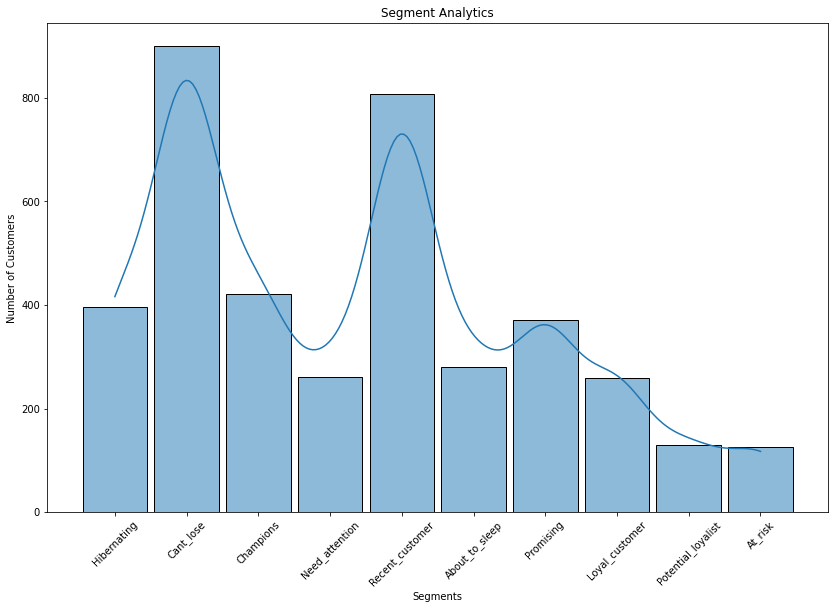

In [ ]:
plt.figure(figsize=(14,9))
ax=sns.histplot(df_RFM['Segment'],kde=True,shrink=0.9)
plt.title('Segment Analytics')
ax.set_xlabel("Segments")
ax.set_ylabel("Number of Customers")
plt.xticks(rotation=45);

<Figure size 1584x1152 with 0 Axes>

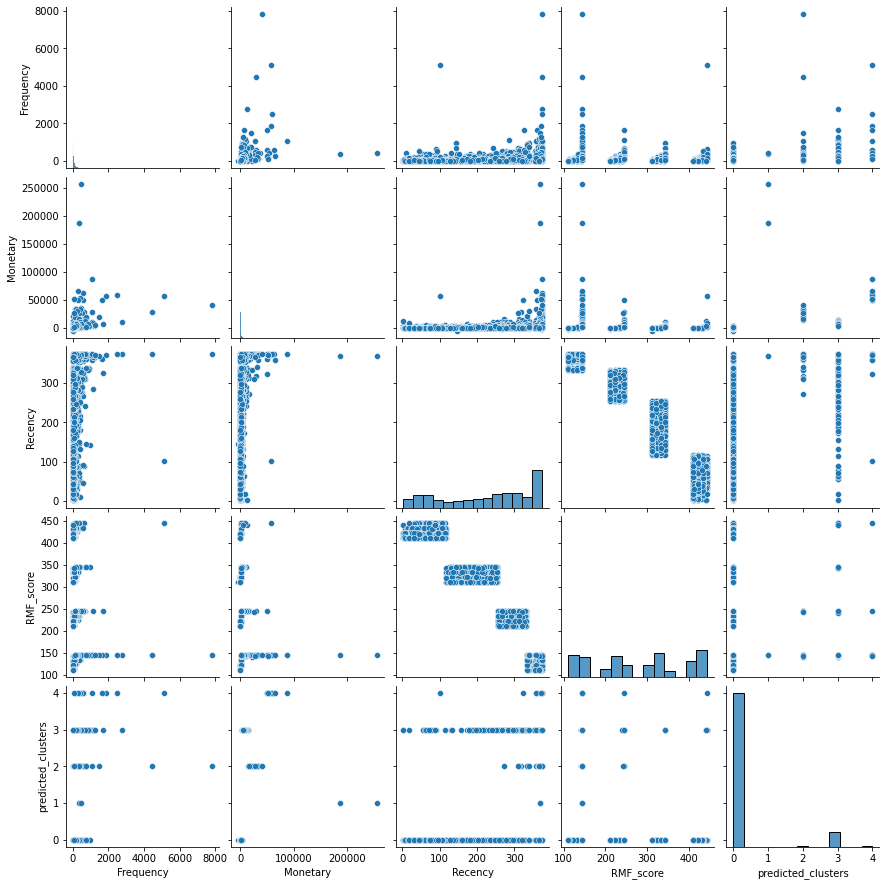

In [ ]:
plt.figure(figsize=(22,16))
sns.pairplot(df_RFM);

In [ ]:
df_RFM.groupby(['Segment'])[['Frequency','Monetary','Recency']].count()

,Frequency,Monetary,Recency
Segment,,,
About_to_sleep,280,280,280
At_risk,125,125,125
Cant_lose,900,900,900
Champions,421,421,421
Hibernating,397,397,397
Loyal_customer,259,259,259
Need_attention,261,261,261
Potential_loyalist,129,129,129
Promising,371,371,371


# 3. Applying K-Means Clustering

## Data Pre-Processing and Exploring

In [ ]:
X=df_RFM[['Frequency','Monetary','Recency']]

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

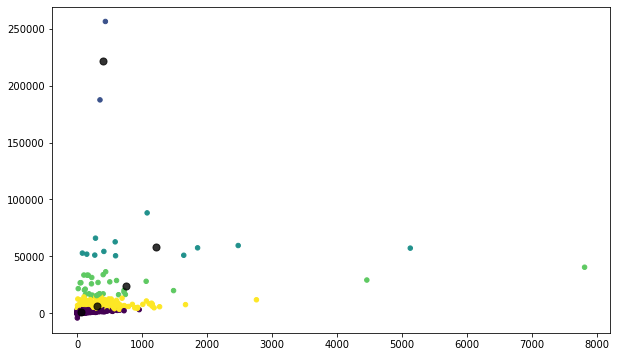

In [ ]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_kmeans, s=20, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=50, alpha=0.8);

### i. Define and Plot Feature Correlations

Create Heatmap and evaluate the results 

In [ ]:
df_RFM['predicted_clusters'].value_counts()

0    3555
3     350
2      31
4      12
1       2
Name: predicted_clusters, dtype: int64

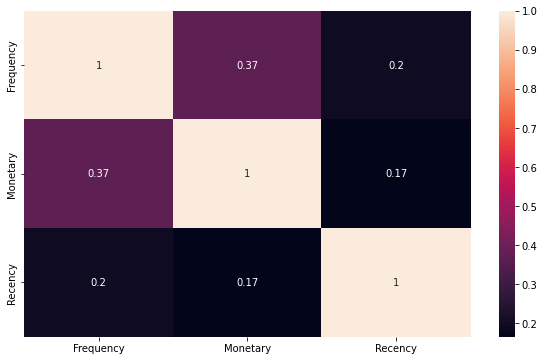

In [ ]:
sns.heatmap(df_RFM[['Frequency','Monetary','Recency']].corr(),annot=True)

### ii. Visualize Feature Distributions

To get a better understanding of the dataset, you can costruct a scatter matrix of each of the three features in the RFM data.

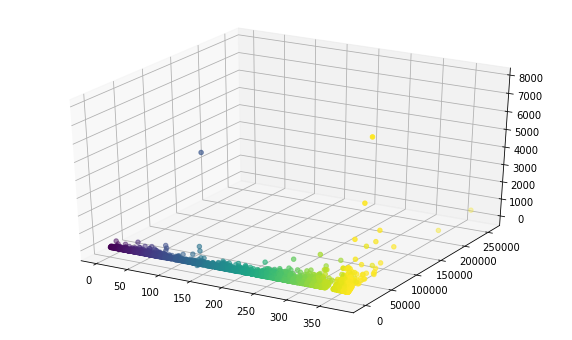

In [ ]:
ax = plt.axes(projection='3d')

ax.scatter3D(df_RFM['Recency'], df_RFM['Monetary'], df_RFM['Frequency'], c=df_RFM['Recency'],cmap='viridis');

In [ ]:
from mpl_toolkits import mplot3d

### iii. Data Normalization

In [ ]:
X=df_RFM[['Frequency','Monetary','Recency']]
X_2=df_RFM[['Frequency','Monetary','Recency']]

In [ ]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X= scaler.fit_transform(X)

1. Logarithmic Tranformation can be used to normalize the values in a column.
2. Plot normalized data with scatter matrix or pairplot. Also evaluate results.

[The Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering) 

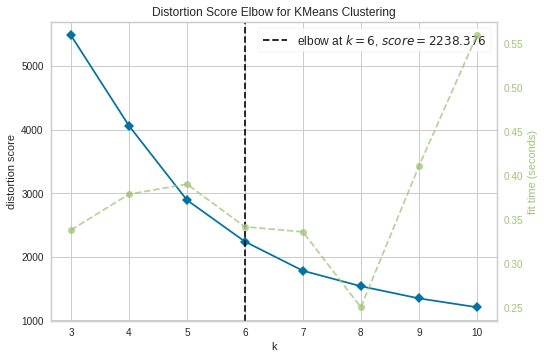

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(3,11))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show();
# score: (default- distortion )(mean of sum squared distances to centers.)

### i. Define the Optimal Number of Clusters

In [ ]:
ssd = [] #sum squared distance

K = range(3,11)

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(X)
    ssd.append(model.inertia_) # intertia: Distance from each sample to centroid of its cluster

Text(0.5, 1.0, 'elbow method')

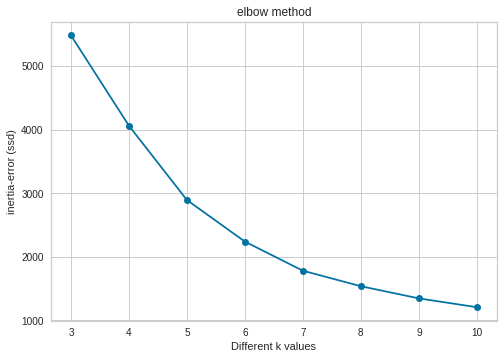

In [ ]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error (ssd)") 
plt.title("elbow method") 

[Silhouette Coefficient](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
range_n_clusters = range(3,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=3, the silhouette score is 0.5255951052426922
For n_clusters=4, the silhouette score is 0.5262209830916827
For n_clusters=5, the silhouette score is 0.5565437817250796
For n_clusters=6, the silhouette score is 0.53933107323944
For n_clusters=7, the silhouette score is 0.46642502613558495
For n_clusters=8, the silhouette score is 0.4687457148702954
For n_clusters=9, the silhouette score is 0.46805905256576164
For n_clusters=10, the silhouette score is 0.4683209374390982


### ii. Model Fitting

In [ ]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [ ]:
kmeans.labels_

array([1, 1, 3, ..., 0, 2, 5], dtype=int32)

### iii. Visualize the Clusters

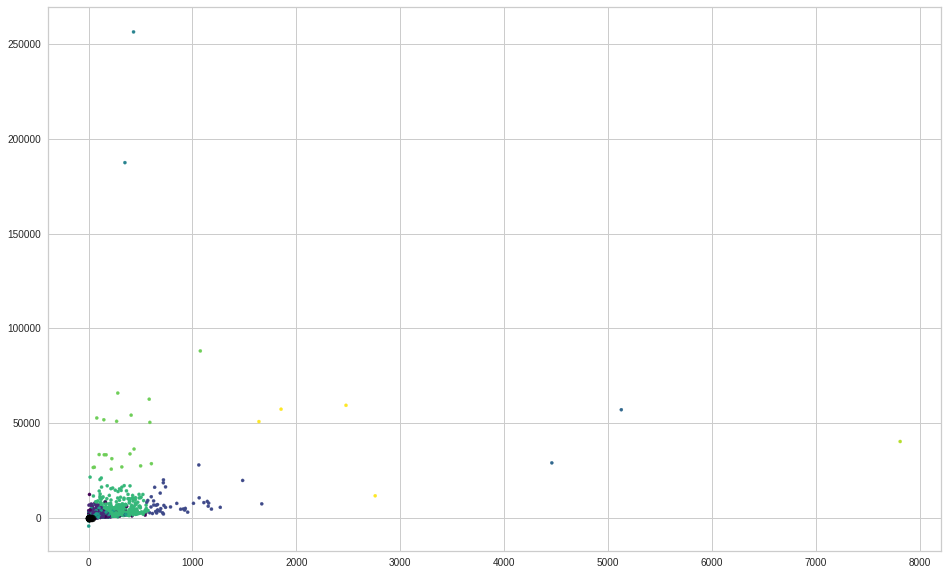

In [ ]:
plt.figure(figsize=(16,10))
plt.scatter(X_2.iloc[:, 0], X_2.iloc[:, 1], c=y_kmeans, s=10, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=50, alpha=0.8);

### iv. Assign the Label

In [ ]:
X_2['clusters'].value_counts()

1    1295
0    1110
5    1096
6     376
2      44
7      20
9       4
3       2
4       2
8       1
Name: clusters, dtype: int64

In [ ]:
X_2['seg_map']=df_RFM['Segment'].map({'Cant_lose':1,'Promising':2,'Potential_loyalist':4,'Loyal_customer':3,'Hibernating':6,
            'Champions':5,'At_risk':8,'About_to_sleep':7,'Need_attention':9,'Recent_customer':0})

In [ ]:
df_RFM['Segment'].value_counts()

Cant_lose             900
Recent_customer       807
Champions             421
Hibernating           397
Promising             371
About_to_sleep        280
Need_attention        261
Loyal_customer        259
Potential_loyalist    129
At_risk               125
Name: Segment, dtype: int64

In [ ]:
clusters=kmeans.labels_

In [ ]:
X_2['clusters']=clusters

,Frequency,Monetary,Recency,clusters
CustomerID,,,,
12346,2,0.000,326,1
12747,103,4196.010,370,1
12748,4459,29072.100,374,3
12749,231,3868.200,214,5
12820,59,942.340,327,1
...,...,...,...,...
18280,10,180.600,278,1
18281,7,80.820,181,5
18282,13,176.600,127,0


In [ ]:
X_2.loc[X_2['seg_map']!=X_2['clusters']].sample(50)

,Frequency,Monetary,Recency,clusters,seg_map
CustomerID,,,,,
13209,329,5820.160,362,6,1
14508,55,276.420,90,0,2
14236,15,490.860,373,1,7
15376,116,1233.360,223,5,3
13821,59,385.640,262,5,9
15513,314,14520.080,374,6,1
17962,34,102.830,143,5,0
14088,590,50415.490,323,7,1
12873,4,374.000,283,1,7


In [ ]:
(X_2['seg_map']==X_2['clusters']).sum()/len(X_2)

0.2665822784810127